In [1]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn .preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE


In [2]:
data = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
data.info() # checking the datatypes of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.describe() #statistical measures of the numerical columns

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
data.describe(include = 'object').T  #detailed measures of the object type columns

,count,unique,top,freq
customerID,7043,7043,3186-AJIEK,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [8]:
data.duplicated().sum() # to check the duplicates

np.int64(0)

In [9]:
data.isnull().sum() # to check the null values

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [10]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')

In [11]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [12]:
data.dropna(inplace = True)

In [13]:
# to check the unique values of every column :
for col in data.columns:
  print(col,data[col].unique())
  print()

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender ['Female' 'Male']

SeniorCitizen [0 1]

Partner ['Yes' 'No']

Dependents ['No' 'Yes']

tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]

PhoneService ['No' 'Yes']

MultipleLines ['No phone service' 'No' 'Yes']

InternetService ['DSL' 'Fiber optic' 'No']

OnlineSecurity ['No' 'Yes' 'No internet service']

OnlineBackup ['Yes' 'No' 'No internet service']

DeviceProtection ['No' 'Yes' 'No internet service']

TechSupport ['No' 'Yes' 'No internet service']

StreamingTV ['No' 'Yes' 'No internet service']

StreamingMovies ['No' 'Yes' 'No internet service']

Contract ['Month-to-month' 'One year' 'Two year']

PaperlessBilling ['Yes' 'No']

PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'C

In [14]:
data.replace(['No internet service', 'No phone service'], 'No', inplace = True)

In [15]:
data['SeniorCitizen']= data['SeniorCitizen'].map({ 1 : 'Yes' , 0 : 'No'})
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

Churn
No     5163
Yes    1869
Name: count, dtype: int64


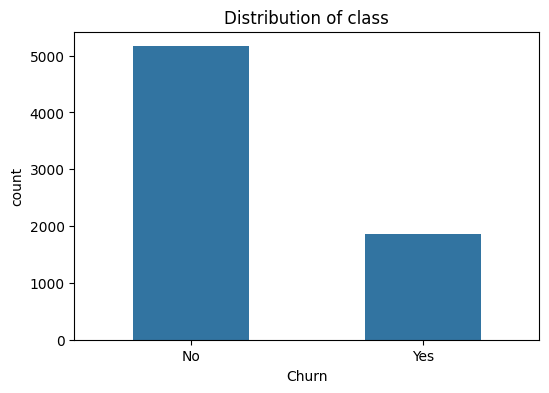

In [16]:
##EDA
#CHECKING FOR CLASS IMBALANCE
print(data['Churn'].value_counts())
plt.figure(figsize = (6,4))
sns.countplot(x = 'Churn',data = data,width =0.5)
plt.title("Distribution of class")
plt.show()

In [17]:
churn_rate = data['Churn'].value_counts(normalize = True)
churn_rate*100

,proportion
Churn,
No,73.421502
Yes,26.578498


**Class is imbalanced with Approximately 74% of retaining customers and 26% of withdrawing customers**

---




##To analyse the continuous variables with respect to Churn status

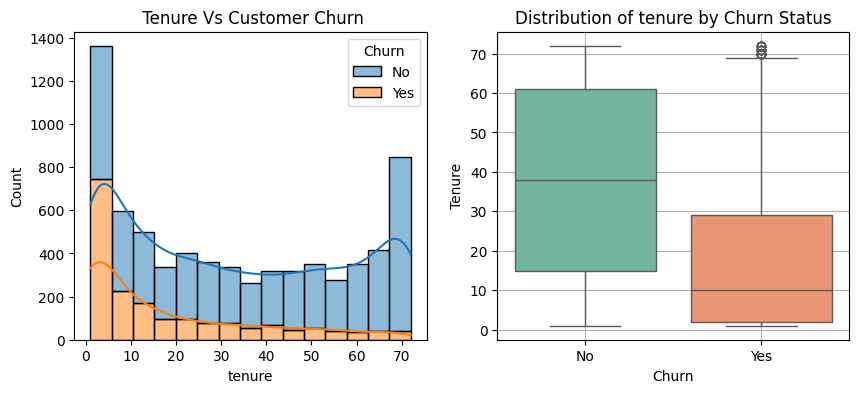

In [18]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.histplot(data = data,x = 'tenure',hue = 'Churn', multiple = 'stack', kde = True)
plt.title (" Tenure Vs Customer Churn")

plt.subplot(1,2,2)
sns.boxplot(x='Churn', y='tenure', data=data, palette='Set2')
plt.title('Distribution of tenure by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.grid(True)
plt.show()



*   As the tenure increases, the churn rate decreases
*   The customers who have left has a median tenure of 10 months



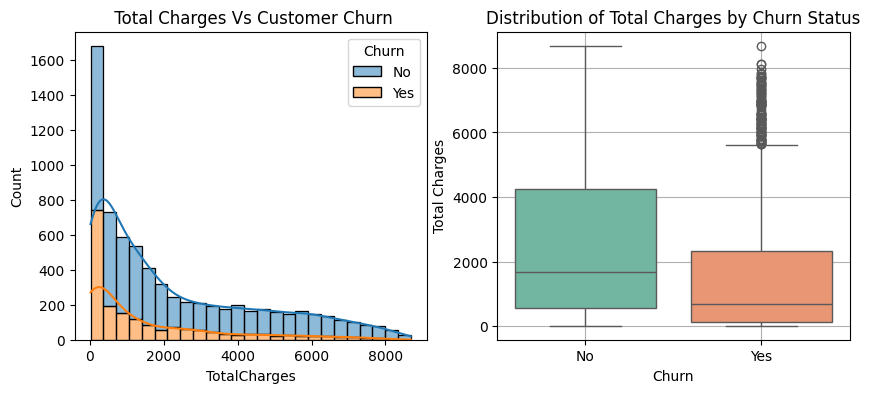

In [19]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.histplot(data = data,x = 'TotalCharges',hue = 'Churn', multiple = 'stack', kde = True)
plt.title (" Total Charges Vs Customer Churn")

plt.subplot(1,2,2)
sns.boxplot(x='Churn', y='TotalCharges', data=data, palette='Set2')
plt.title('Distribution of Total Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Total Charges')

plt.grid(True)
plt.show()

The median Total charges of customers who have churned is low.

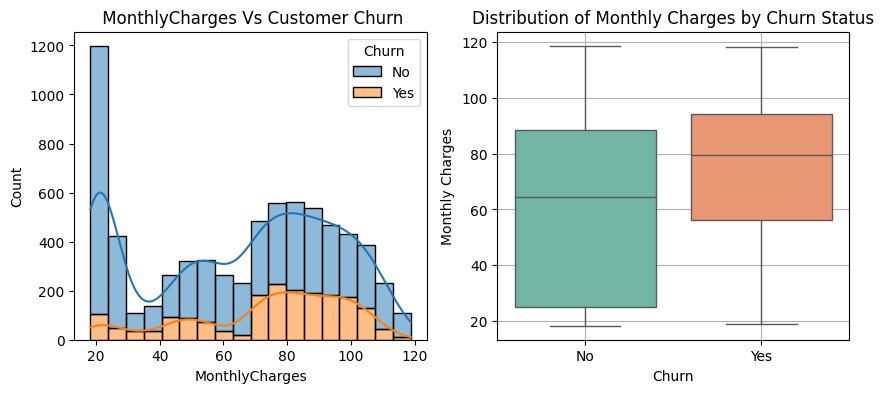

In [20]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.histplot(data = data,x = 'MonthlyCharges',hue = 'Churn', multiple = 'stack', kde = True)
plt.title (" MonthlyCharges Vs Customer Churn")

plt.subplot(1,2,2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=data, palette='Set2')
plt.title('Distribution of Monthly Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.grid(True)
plt.show()


The customers who have churned have higher monthly charges(80) than the median monthly charges (approx 65) of the remaining customers


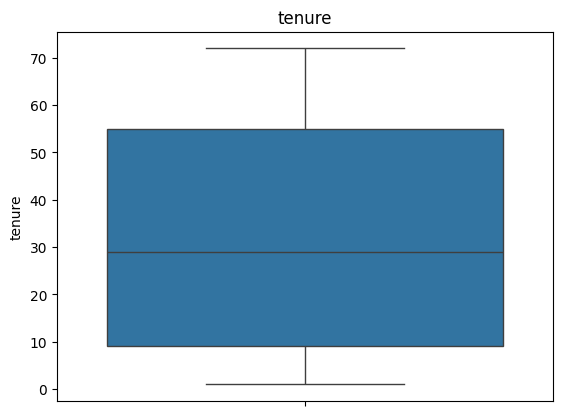

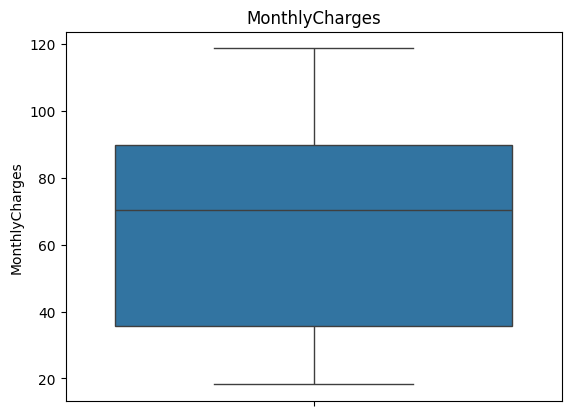

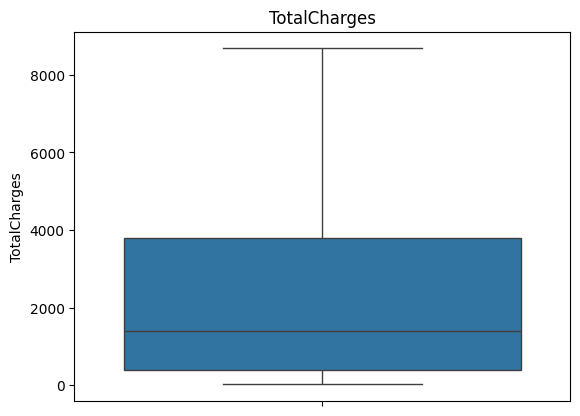

In [21]:
# to check the outliers in the numerical columns :
for col in data.columns :
  if (data[col].dtypes != 'object'):
    sns.boxplot(data[col])
    plt.title(col)
    plt.show()

In [22]:
bins = [0, 12, 24, 36, 48, 60, 72, float('inf')]
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72', '72+']

# Create a new column with tenure groups
data['tenure_group'] = pd.cut(data['tenure'], bins=bins, labels=labels, right=True, include_lowest=True)


In [23]:
data[['tenure','tenure_group']]

,tenure,tenure_group
0,1,0-12
1,34,25-36
2,2,0-12
3,45,37-48
4,2,0-12
...,...,...
7038,24,13-24
7039,72,61-72
7040,11,0-12
7041,4,0-12


In [24]:
#categorical columns :
def countplot(column):
  plt.figure(figsize = (7,4))
  ax = sns.countplot(data = data,x = column,hue = 'Churn')
  for i in ax.containers:
    ax.bar_label(i)
  plt.title(f"Customer Churned by {column}")
  plt.show()

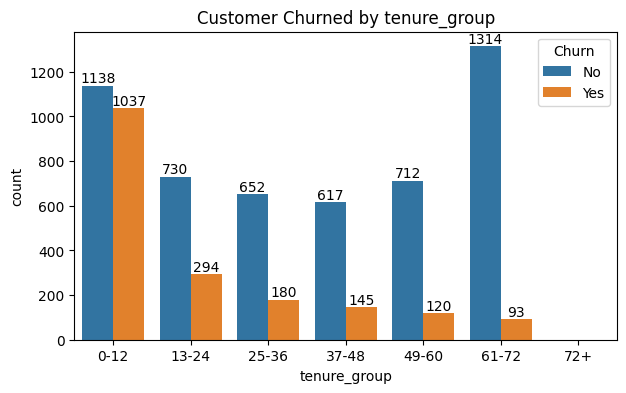

In [25]:
countplot('tenure_group')


The churn rate is **high in the customers having the tenure of 0-12 months**


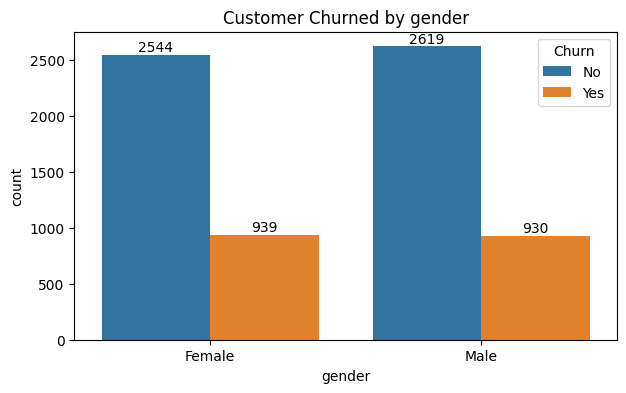

In [26]:
countplot('gender')

The churn percentage is **almost equal in case of Gender**


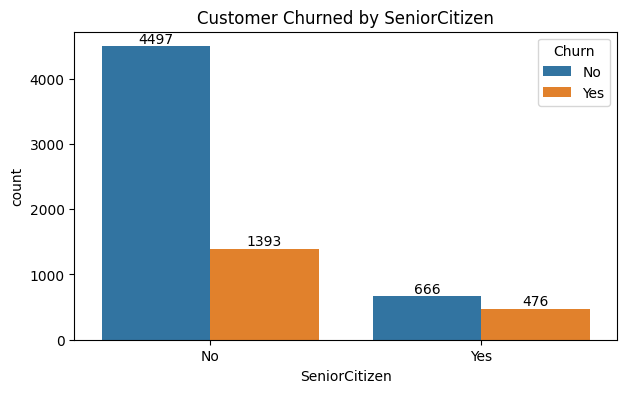

In [27]:
countplot('SeniorCitizen')

The churn rate is **less in senior Citizens**

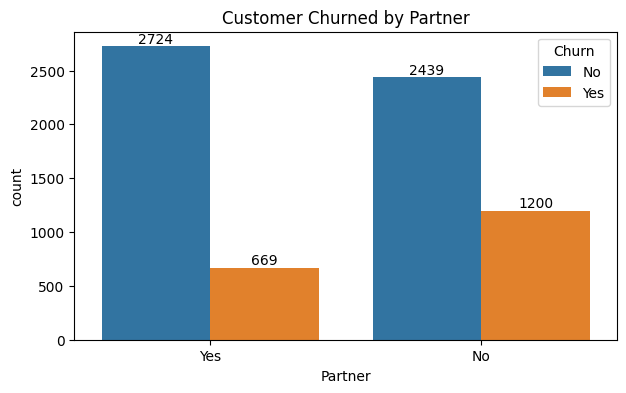

In [28]:
countplot('Partner')

customers **having partners are less likely to churn**

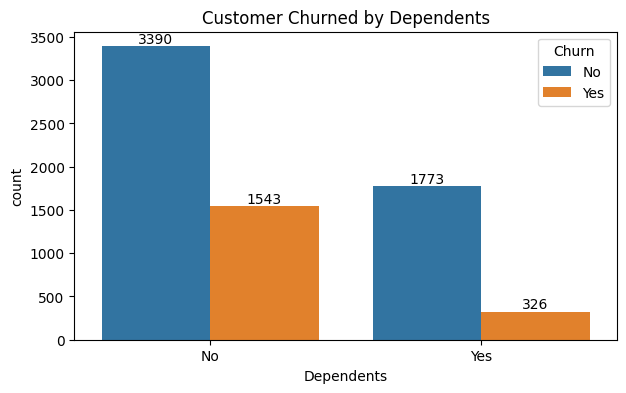

In [29]:
countplot('Dependents')

the churn rate is **less in customers with dependents**

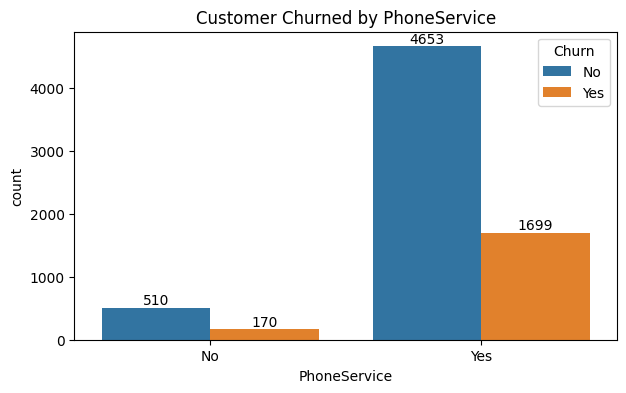

In [30]:
countplot('PhoneService')

Cusomers with **phone service is more likely to churn**

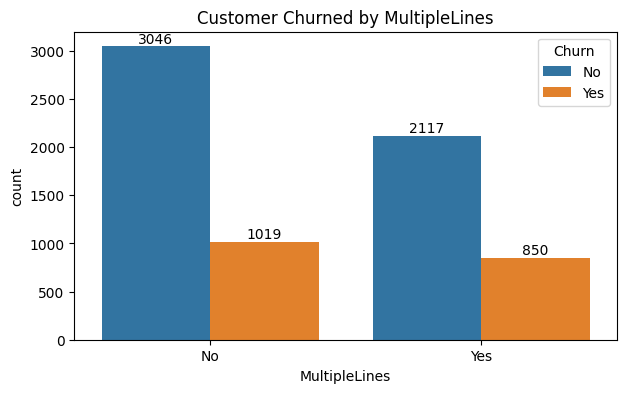

In [31]:
countplot('MultipleLines')

customers **having multiple lines are less likely to churn**

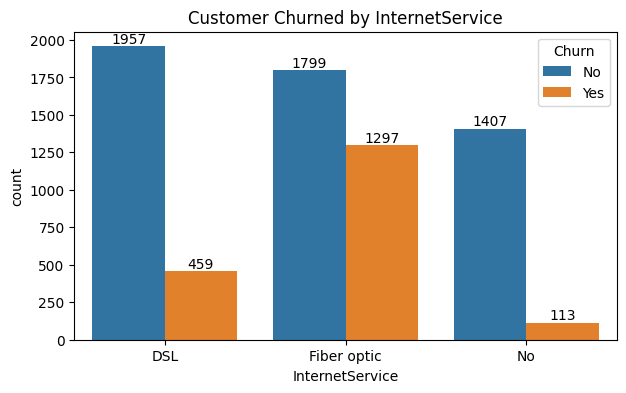

In [32]:
countplot('InternetService')

the churn rate is **higher in the case of Fibre optic Internet service**

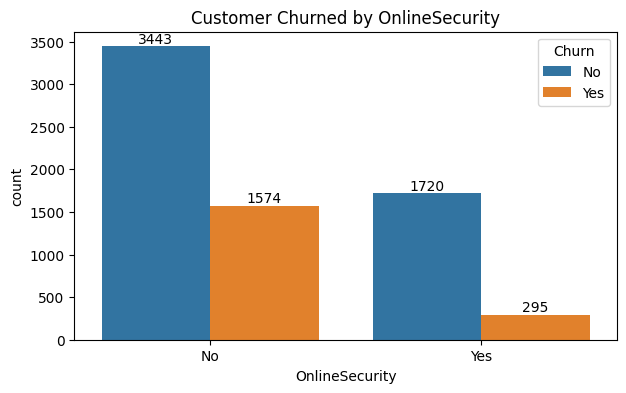

In [33]:
countplot('OnlineSecurity')

customers **having online security are less likely to churn**

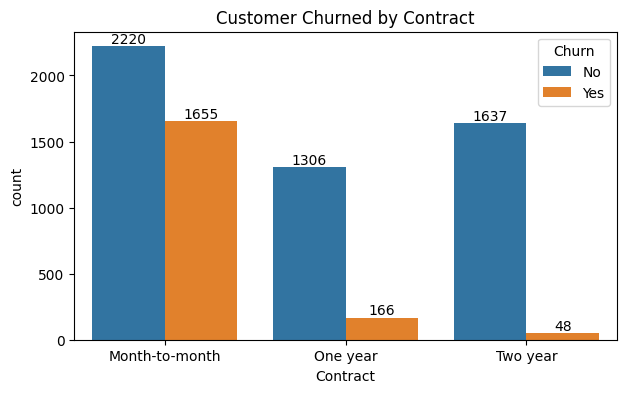

In [34]:
countplot('Contract')

the churn rate **is higher with the customers who are having month on month contract** compared to other contracts


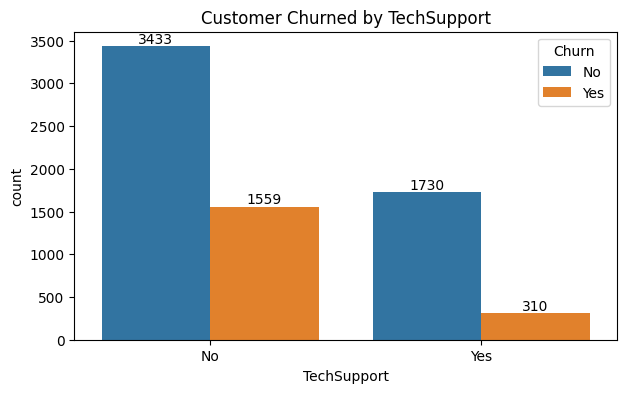

In [35]:
countplot('TechSupport')

Customers who are **not provided with Tech support are likely to churn**

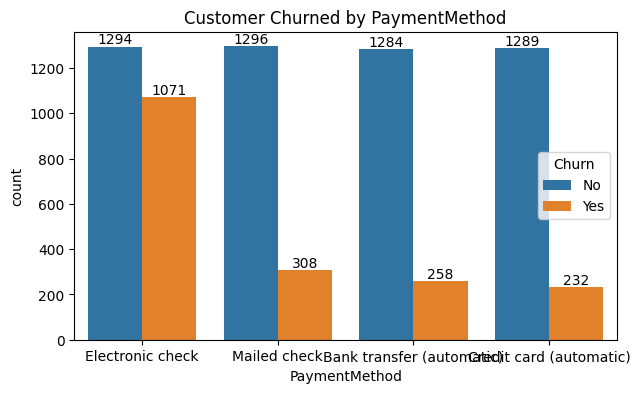

In [36]:
countplot('PaymentMethod')

the churn rate **is higher with the payment mode of Electronic check**

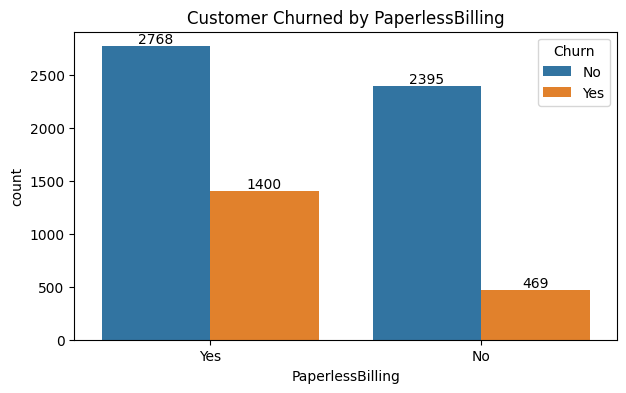

In [37]:
countplot('PaperlessBilling')

customers **whose has paperless billing is likely to churn**

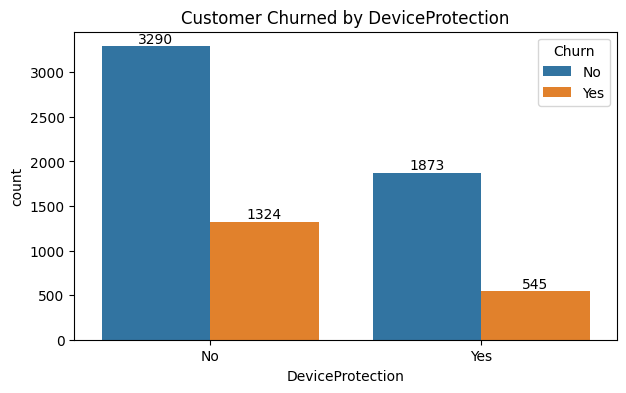

In [38]:
countplot('DeviceProtection')

customers who are **not having device protection is likely to churn**

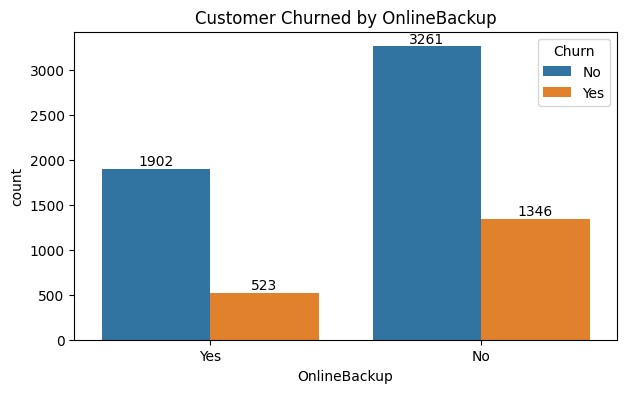

In [39]:
countplot('OnlineBackup')

customers who are **not having Online Backup are likely to churn**

In [40]:
data = data.drop(columns = 'customerID')

In [41]:
data['Churn'] = data['Churn'].map({'Yes' : 1 , 'No' : 0 }) #Mapping the classes to 0 and 1

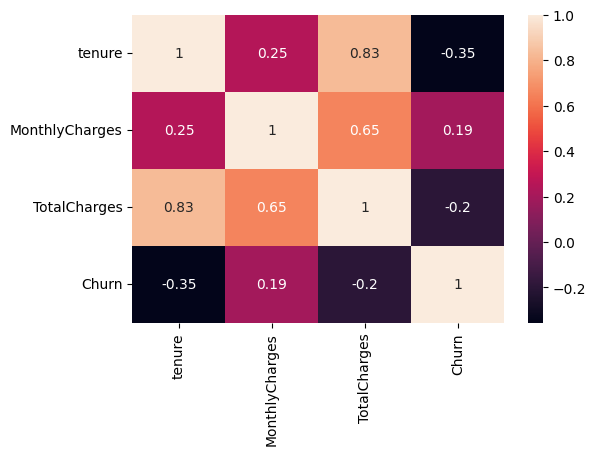

In [42]:
# correlation of numerical columns :
correlation = data.select_dtypes(include = np.number).corr()
plt.figure(figsize = (6,4))
sns.heatmap(correlation,annot = True)
plt.show()

there is corelation between total_charges, monthly charges abnd tenure

In [43]:
#label encoding : for binary data encoding
le = LabelEncoder()

In [44]:
# for encoding the categorical columns having unique values <=2
for col in data.columns:
    if (data[col].dtype == 'O') and (data[col].nunique() <= 2):
        data[col] = le.fit_transform(data[col])
        print(f"\nEncoded values for column '{col}' are:")
        mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        for original, encoded in mapping.items():
            print(f"  {original} : {encoded}")


Encoded values for column 'gender' are:
  Female : 0
  Male : 1

Encoded values for column 'SeniorCitizen' are:
  No : 0
  Yes : 1

Encoded values for column 'Partner' are:
  No : 0
  Yes : 1

Encoded values for column 'Dependents' are:
  No : 0
  Yes : 1

Encoded values for column 'PhoneService' are:
  No : 0
  Yes : 1

Encoded values for column 'MultipleLines' are:
  No : 0
  Yes : 1

Encoded values for column 'OnlineSecurity' are:
  No : 0
  Yes : 1

Encoded values for column 'OnlineBackup' are:
  No : 0
  Yes : 1

Encoded values for column 'DeviceProtection' are:
  No : 0
  Yes : 1

Encoded values for column 'TechSupport' are:
  No : 0
  Yes : 1

Encoded values for column 'StreamingTV' are:
  No : 0
  Yes : 1

Encoded values for column 'StreamingMovies' are:
  No : 0
  Yes : 1

Encoded values for column 'PaperlessBilling' are:
  No : 0
  Yes : 1


In [45]:
#one hot encoding
cat_cols = [col for col in data.columns if data[col].dtype == object]
data = pd.concat([data, pd.get_dummies(data[cat_cols], drop_first=True, dtype=int)], axis=1)
data= data.drop(columns=cat_cols)

In [46]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,TotalCharges,Churn,tenure_group,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,0,0-12,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1889.50,0,25-36,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,108.15,1,0-12,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1840.75,0,37-48,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,151.65,1,0-12,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,1990.50,0,13-24,0,0,1,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,7362.90,0,61-72,1,0,1,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,346.45,0,0-12,0,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,306.60,1,0-12,1,0,0,0,0,0,1


Data Preparation :


* Data Splitting for trainintg and testing
* Standarization of data
* Balancing the training date using SMOTE  










In [47]:
X = data.drop(columns = ['Churn','tenure_group'])
y = data['Churn']

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42,stratify = y)

In [49]:
sc = StandardScaler()
X_train[['MonthlyCharges','TotalCharges','tenure']] = sc.fit_transform(X_train[['MonthlyCharges','TotalCharges','tenure']])
X_test[['MonthlyCharges','TotalCharges','tenure']] = sc.transform(X_test[['MonthlyCharges','TotalCharges','tenure']])

In [50]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [51]:
#Logistic Regression
log_model = LogisticRegression(random_state = 42)
log_model.fit(X_train_res,y_train_res)
y_pred = log_model.predict(X_test)
y_pred_proba = log_model.predict_proba(X_test)[:, 1]
accuracy_log = roc_auc_score(y_test,y_pred_proba)
print(f"The accuracy of Logistic Regression Model is {accuracy_log*100}")



The accuracy of Logistic Regression Model is 82.76462305418515


In [52]:
#Decision Tree classifier :
DT_model = DecisionTreeClassifier(random_state = 42)
DT_model.fit(X_train_res,y_train_res)
y_pred = DT_model.predict(X_test)
y_pred_proba = DT_model.predict_proba(X_test)[:, 1]
accuracy_DT = roc_auc_score(y_test,y_pred_proba)
print(f"The accuracy of Decision Tree Model is {accuracy_DT*100}")


The accuracy of Decision Tree Model is 65.84968758250463


In [53]:
#Random forest Model :
acc_list = []
for i in range(100,1000,100):
 RF_model = RandomForestClassifier(n_estimators = i)
 RF_model.fit(X_train_res,y_train_res)
 y_pred = RF_model.predict(X_test)
 y_pred_proba = RF_model.predict_proba(X_test)[:, 1]
 accuracy = roc_auc_score(y_test,y_pred_proba)*100
 acc_list.append(accuracy)
print(f"The accuracy of Random Forest Model is {acc_list} ")


The accuracy of Random Forest Model is [np.float64(81.38333393728873), np.float64(81.81468750485323), np.float64(81.79863954734405), np.float64(81.6261240041207), np.float64(81.77327342095863), np.float64(81.93142345383106), np.float64(81.7752147061412), np.float64(81.77767366737243), np.float64(81.78129739971321)] 


In [64]:
#Hyper-Parameter Tuning

param_grid = {
    'n_estimators': [200,300,600,900],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_res, y_train_res)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 600}
Best Accuracy: 0.8478208232445521
Test Accuracy: 0.7732764747690121


In [57]:
rf = RandomForestClassifier(random_state=42, n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_depth=None, criterion='gini')
rf.fit(X_train_res, y_train_res)
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]
accuracy_rf = roc_auc_score(y_test, y_pred_proba)
print(f"The accuracy of Random Forest Model is {accuracy_rf *100}")

The accuracy of Random Forest Model is 81.81067551547592


In [58]:
GB_Model = GradientBoostingClassifier(learning_rate =0.01, random_state=42)
GB_Model.fit(X_train_res,y_train_res)
y_pred = GB_Model.predict(X_test)
y_pred_proba = GB_Model.predict_proba(X_test)[:, 1]
accuracy_GB = roc_auc_score(y_test,y_pred_proba)
print(f"The accuracy of Gradient Boosting Model is {accuracy_GB*100}")

The accuracy of Gradient Boosting Model is 82.57916560974473


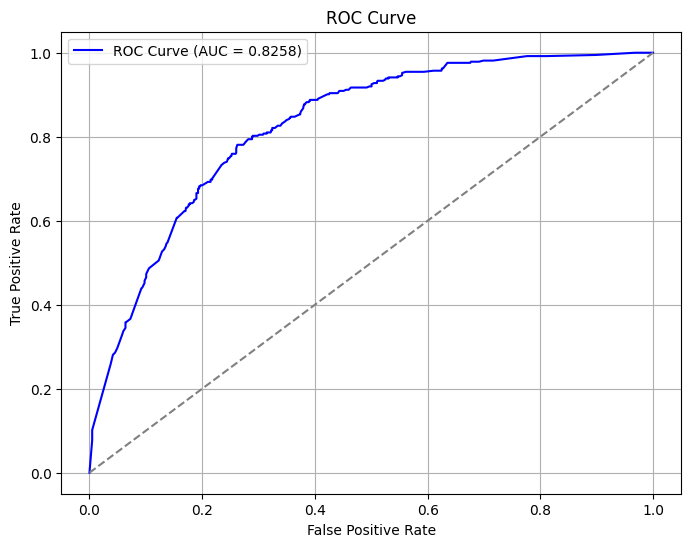

In [60]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#FPR,TPR,thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

#Calculating AUC
auc_score = roc_auc_score(y_test, y_pred_proba)

#Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [65]:
#Hyper-Parameter Tuning :
XGB_model = XGBClassifier()
parameters = {'n_estimators': [150, 500, 800, 1000],
               'learning_rate':[ 0.01, 0.1, 0.3],
               'max_depth': [20,30,40,50],
               'subsample': [0.3,0.5]}
grid_search_xgb = GridSearchCV(XGB_model,param_grid = parameters, cv = 5)
grid_search_xgb.fit(X_train_res, y_train_res)
best_parameters_xgb = grid_search_xgb.best_params_
print("Best parameters for the XGB model is :\n\n")
best_parameters_xgb

Best parameters for the XGB model is :




{'learning_rate': 0.01,
 'max_depth': 30,
 'n_estimators': 1000,
 'subsample': 0.5}

In [54]:
XGB_model = XGBClassifier(random_state = 42, learning_rate = 0.01)
XGB_model.fit(X_train_res,y_train_res)
y_pred = XGB_model.predict(X_test)
y_pred_proba = XGB_model.predict_proba(X_test)[:, 1]
accuracy_XGB = roc_auc_score(y_test,y_pred_proba)
print(f"the accuracy of the XGB Model is {accuracy_XGB*100}")
print( classification_report(y_test,y_pred))

the accuracy of the XGB Model is 82.72773863571655
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.50      0.78      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.75      1407



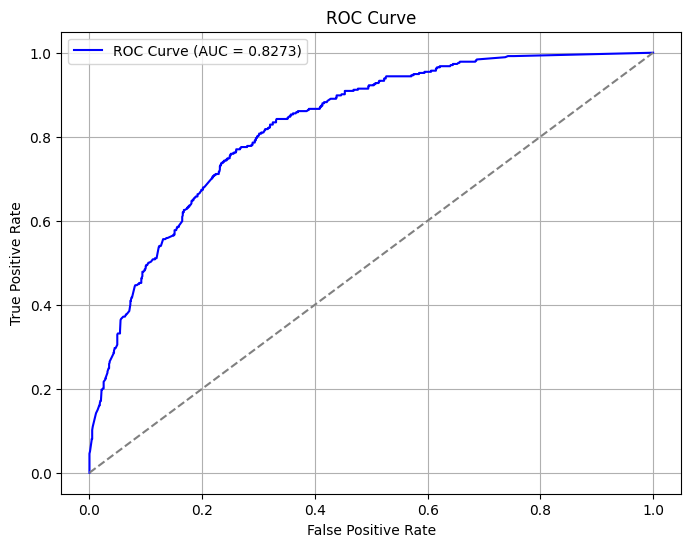

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#FPR,TPR,thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

#Calculating AUC
auc_score = roc_auc_score(y_test, y_pred_proba)

#Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [59]:
print(f"The accuracy of the Logistic Regression Model is {accuracy_log*100}")
print(f"The accuracy of the Decision Tree Model is {accuracy_DT*100}")
print(f"The accuracy of the Random Forest Model is {accuracy_rf*100}")
print(f"The accuracy of the Gradient Boosting Model is {accuracy_GB*100}")
print(f"The accuracy of the XGB Model is {accuracy_XGB*100}")

The accuracy of the Logistic Regression Model is 82.76462305418515
The accuracy of the Decision Tree Model is 65.84968758250463
The accuracy of the Random Forest Model is 81.81067551547592
The accuracy of the Gradient Boosting Model is 82.57916560974473
The accuracy of the XGB Model is 82.72773863571655


**Out of all the classification models used, Logistic Regression model has given the best accuracy**







